<a href="https://colab.research.google.com/github/tawfeeq6719/RIS-UAV-Aided-RSMA-system-for-6G-communication-using-deep-neural-network/blob/main/FINAL_DL_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.datasets import fetch_openml  # Import for fetching datasets
from sklearn.model_selection import train_test_split  # Import for splitting data

# Fetch your dataset using fetch_openml
# Import the data set
data_set = pd.read_csv('data_set_small.csv')
print('The shape of the data set is: ', data_set.shape)
df = pd.DataFrame(data_set)
X = df.iloc[:, :13] # select the first 13 feature columns
y= df.iloc[:, 13] # select the last column

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a sequential model
model = Sequential()

# Add hidden layers with ReLU activation
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_initializer = 'normal'))
model.add(Dense(128, activation='relu', kernel_initializer = 'normal'))
model.add(Dense(128, activation='relu', kernel_initializer = 'normal'))
model.add(tf.keras.layers.Dense(1,activation = 'linear', kernel_initializer = 'normal'))
model.compile(loss='mse', optimizer='adam')


# Define Early Stopping callback to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3)  # Monitor validation loss for 3 epochs

# Train the model with Early Stopping callback
history_2 = model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test), callbacks=[early_stopping])

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate your model's performance (e.g., mean squared error for regression)

The shape of the data set is:  (19999, 14)
Epoch 1/100
500/500 [==============================] - 2s 3ms/step - loss: 0.0104 - val_loss: 5.6875e-04
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 1.5491e-04 - val_loss: 8.7497e-05
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 8.2253e-05 - val_loss: 3.9233e-05
Epoch 4/100
500/500 [==============================] - 1s 3ms/step - loss: 5.9946e-04 - val_loss: 1.8705e-04
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 3.3389e-05 - val_loss: 1.9586e-05
Epoch 6/100
500/500 [==============================] - 1s 2ms/step - loss: 4.9916e-05 - val_loss: 2.0966e-05
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 2.3511e-05 - val_loss: 7.8150e-05
Epoch 8/100
125/125 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np




# Calculate multiple loss metrics after model fitting
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rms = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (MSE):", rms)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.00034780066240347614
Mean Absolute Error (MAE): 0.013297066592437177
Root Mean Squared Error (MSE): 0.01864941453245855
R-squared: 0.997514203660172


In [ ]:
model.save('trained_DNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


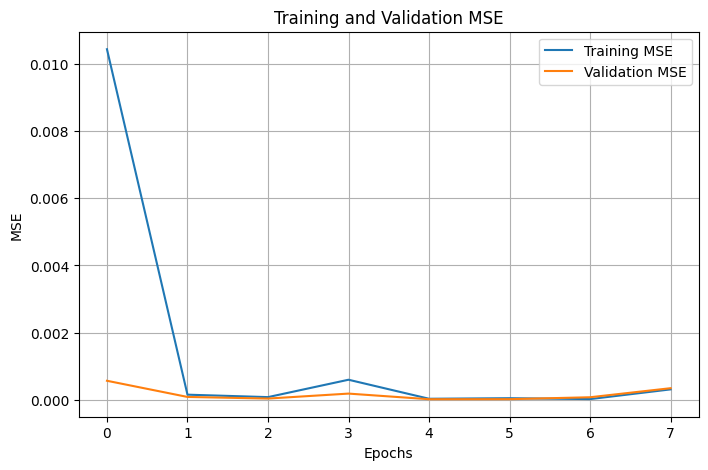

In [ ]:
import matplotlib.pyplot as plt
# Extract training and validation loss from history
train_loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

# Create the plot
plt.figure(figsize=(8, 5))
plt.plot(history_2.epoch, train_loss, label='Training MSE')
plt.plot(history_2.epoch, val_loss, label='Validation MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)
plt.show()